In [4]:
from numba import cuda
import numpy as np
from matplotlib import pyplot as plt

In [2]:
@cuda.jit
def convolve(result, data, kernel):
    '''!
        Convolve the 1D data using the kernel
    '''

    # Get the dimensions of the arrays
    (data_size, _) = data.shape
    (_, kernel_size) = kernel.shape

    # Get the thread and block id in the grid
    thread_id = cuda.grid(1)
    block_id = cuda.blockIdx.x

    # Calculate the starting and ending indices of the data array
    # based on the thread id
    start_idx = block_id * data_size
    end_idx = start_idx + data_size

    # Iterate over all the rows
    for i in range(start_idx, end_idx):
        # Calculate the starting and ending indices of the kernel
        # based on the thread id
        start_idx_kernel = thread_id - kernel_size // 2
        end_idx_kernel = start_idx_kernel + kernel_size

        # Calculate the starting and ending indices of the result
        # array based on the thread id
        start_idx_result = i - kernel_size // 2
        end_idx_result = start_idx_result + kernel_size

        # Iterate over all the columns
        for j in range(start_idx_result, end_idx_result):
            # Calculate the convolution
            result[i, j] = (data[i, start_idx_kernel:end_idx_kernel] *
                            kernel[start_idx_kernel:end_idx_kernel, j]).sum()


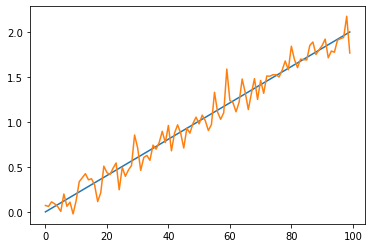

In [5]:
data = 2*np.linspace(0,1,100)
noise = np.random.normal(0,0.1,100)

observation = data+noise

plt.plot(data)
plt.plot(observation)

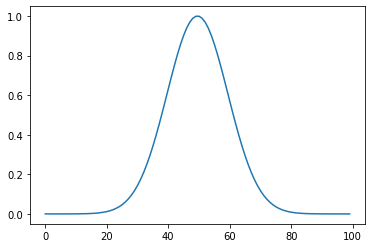

In [6]:
x = np.linspace(-0.5,0.5,100)
sigma = 0.1

kernel = np.exp(-np.power((x), 2)/(2*np.power(sigma, 2)))

plt.plot(kernel)

In [7]:
result = np.empty_like(data)

convolve(result, data, kernel)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.typeinfer.ExhaustIterConstraint object at 0x0000023058ABBAC0>.
[1m[1mwrong tuple length for '$4load_attr.1': expected 2, got 1[0m
[0m[1m[1] During: typing of exhaust iter at <ipython-input-2-5b12b11822aa> (8)[0m
Enable logging at debug level for details.
[1m
File "<ipython-input-2-5b12b11822aa>", line 8:[0m
[1mdef convolve(result, data, kernel):
    <source elided>
    # Get the dimensions of the arrays
[1m    (data_size, _) = data.shape
[0m    [1m^[0m[0m
